# 통계세미나 plot
---
---
* 201902890 이태녕

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import warnings
import itertools

In [152]:
plt.rc('font', family = 'Malgun Gothic')

---
---

### 성별/외국인/나이/전과자별 주요 범죄 분석

> 각각의 class별 범죄 유형을 pi차트로 plot 해보고, 각 클래스 별 상위 범죄유형을 plot해본다. 
> 그리고 5개의 class를 한 개의 그래프에 꺾은선 그래프로 time series plot해서 추세를 본다.

**data는 kosis 활용**

---
#### 성별

In [153]:
# 성별
df_gender = pd.read_excel('C:/Users/galax/Downloads/criminal_gender.xlsx')
#print(df_gender)
df_gender = pd.DataFrame(df_gender)
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄별(3)  241 non-null    object
 1   2002    241 non-null    object
 2   2002.1  241 non-null    object
 3   2003    241 non-null    object
 4   2003.1  241 non-null    object
 5   2004    241 non-null    object
 6   2004.1  241 non-null    object
 7   2005    241 non-null    object
 8   2005.1  241 non-null    object
 9   2006    241 non-null    object
 10  2006.1  241 non-null    object
 11  2007    241 non-null    object
 12  2007.1  241 non-null    object
 13  2008    241 non-null    object
 14  2008.1  241 non-null    object
 15  2009    241 non-null    object
 16  2009.1  241 non-null    object
 17  2010    241 non-null    object
 18  2010.1  241 non-null    object
 19  2011    241 non-null    object
 20  2011.1  241 non-null    object
 21  2012    241 non-null    object
 22  2012.1  241 non-null    ob

In [154]:
df_gender.head()

,범죄별(3),2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,범죄별(3),남자 (명),여자(B) (명),남자 (명),여자(B) (명),남자 (명),여자(B) (명),남자 (명),여자(B) (명),남자 (명),...,남자 (명),여자(B) (명),남자 (명),여자(B) (명),남자 (명),여자(B) (명),남자 (명),여자(B) (명),남자 (명),여자(B) (명)
1,절도,51597,8627,48998,9086,47338,9091,47593,8709,52169,...,73632,24190,75383,26432,73065,25844,61452,24577,66670,28084
2,장물,1856,235,1788,258,1479,194,1598,224,1862,...,1516,287,1225,234,902,188,523,94,471,113
3,사기,176995,70084,191359,92418,211068,101109,187691,72834,194861,...,183368,55168,196330,60096,195901,57075,129381,38537,133649,40594
4,횡령,21374,3551,22470,4238,23305,4627,21915,4108,22536,...,28457,8615,28502,8800,28340,9161,21387,7677,23098,8225


In [155]:
# 남성 v 여성으로 분할 (연도 통합)
df_gender_v = df_gender.drop(0)

df_gender_v.columns = ['' for _ in range(43)]
df_gender_v.head()

,,,,,,,,,,,...,,,,,,,,,,
1,절도,51597,8627,48998,9086,47338,9091,47593,8709,52169,...,73632,24190,75383,26432,73065,25844,61452,24577,66670,28084
2,장물,1856,235,1788,258,1479,194,1598,224,1862,...,1516,287,1225,234,902,188,523,94,471,113
3,사기,176995,70084,191359,92418,211068,101109,187691,72834,194861,...,183368,55168,196330,60096,195901,57075,129381,38537,133649,40594
4,횡령,21374,3551,22470,4238,23305,4627,21915,4108,22536,...,28457,8615,28502,8800,28340,9161,21387,7677,23098,8225
5,배임,5223,1065,5409,1412,5330,1489,5371,1387,5381,...,7932,1719,7869,1792,7596,1808,5483,1230,5308,1163


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 1 to 240
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0           240 non-null    object 
 1           181 non-null    float64
 2           174 non-null    float64
 3           182 non-null    float64
 4           172 non-null    float64
 5           183 non-null    float64
 6           176 non-null    float64
 7           182 non-null    float64
 8           174 non-null    float64
 9           181 non-null    float64
 10          171 non-null    float64
 11          179 non-null    float64
 12          167 non-null    float64
 13          176 non-null    float64
 14          168 non-null    float64
 15          178 non-null    float64
 16          170 non-null    float64
 17          177 non-null    float64
 18          164 non-null    float64
 19          179 non-null    float64
 20          168 non-null    float64
 21          178 non-null    float64
 22    

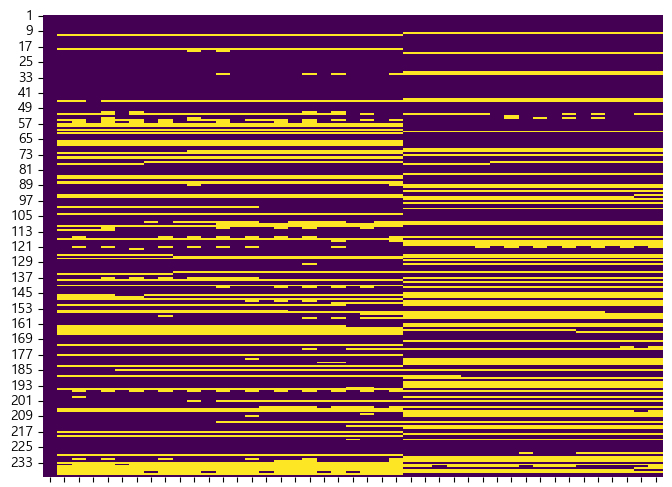

In [156]:
# 결측치 있나 보려고 시각화
df_gender_v.replace('-', np.nan, inplace=True)
plt.figure(figsize=(8, 6))
sns.heatmap(df_gender_v.isnull(), cmap='viridis', cbar=False)

# data type 확인
df_gender_v.info()

In [157]:
crime_name = df_gender_v.iloc[:, 0]
crime_name.size

240

In [158]:
male_columns_sum = df_gender_v.iloc[:, 1::2].sum(axis=1)
#print(male_columns_sum)


In [159]:
data_male = pd.concat([crime_name, male_columns_sum], axis=1) #연도별로 합친 남성의 범죄자 수와 범죄 이름을 가진 dataframe

data_male = pd.DataFrame(data_male)

data_male = data_male.rename(columns={"": '범죄명', 0: '범죄자 수'})  # 새로운 열 이름으로 변경



In [160]:
female_columns_sum = df_gender_v.iloc[:, 2::2].sum(axis=1)
data_female = pd.concat([crime_name, female_columns_sum], axis=1) #연도별로 합친 여성의 범죄자 수와 범죄 이름을 가진 dataframe
data_female = data_female.rename(columns={"": '범죄명', 0: '범죄자 수'})  # 새로운 열 이름으로 변경


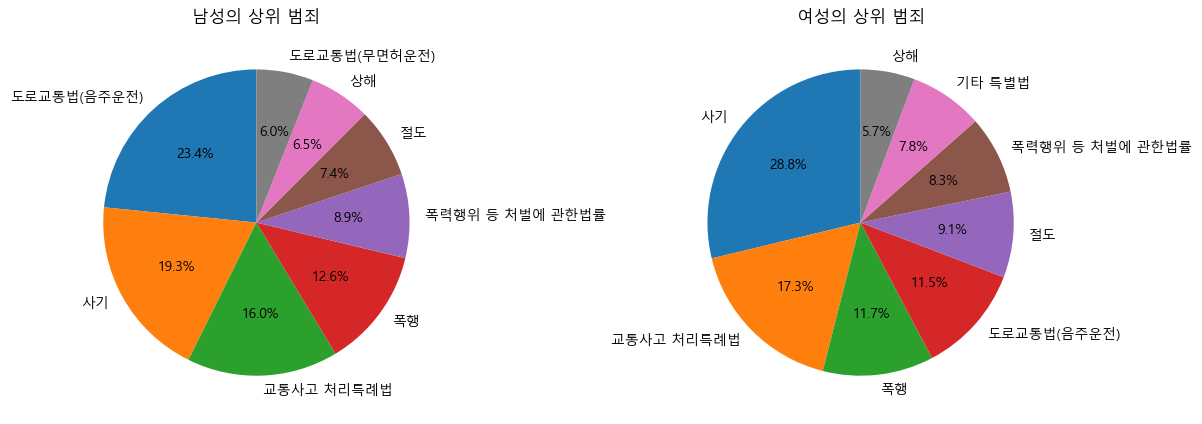

In [180]:
# 성별 정보 추가
data_male['성별'] = '남성'
data_female['성별'] = '여성'
# 성별 데이터프레임 합치기
df = pd.concat([data_male, data_female])

# 범죄명을 기준으로 그룹화하여 범죄자 수 합산
df_grouped = df.groupby(['성별', '범죄명']).sum().reset_index()

# 남성과 여성에서 각각 상위 범죄 추출
top_crimes_male = df_grouped[df_grouped['성별'] == '남성'].nlargest(8, '범죄자 수')
top_crimes_female = df_grouped[df_grouped['성별'] == '여성'].nlargest(8, '범죄자 수')

# 범죄명에 대한 색상 매핑을 위한 사전
colors = plt.cm.tab10.colors

# 남성의 상위 범죄 파이 차트
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(top_crimes_male['범죄자 수'], labels=top_crimes_male['범죄명'], autopct='%1.1f%%', startangle=90, colors=colors[:len(top_crimes_male)])
plt.title('남성의 상위 범죄')

# 여성의 상위 범죄 파이 차트
plt.subplot(1, 2, 2)
plt.pie(top_crimes_female['범죄자 수'], labels=top_crimes_female['범죄명'], autopct='%1.1f%%', startangle=90, colors=colors[:len(top_crimes_female)])
plt.title('여성의 상위 범죄')

plt.tight_layout()
plt.show()

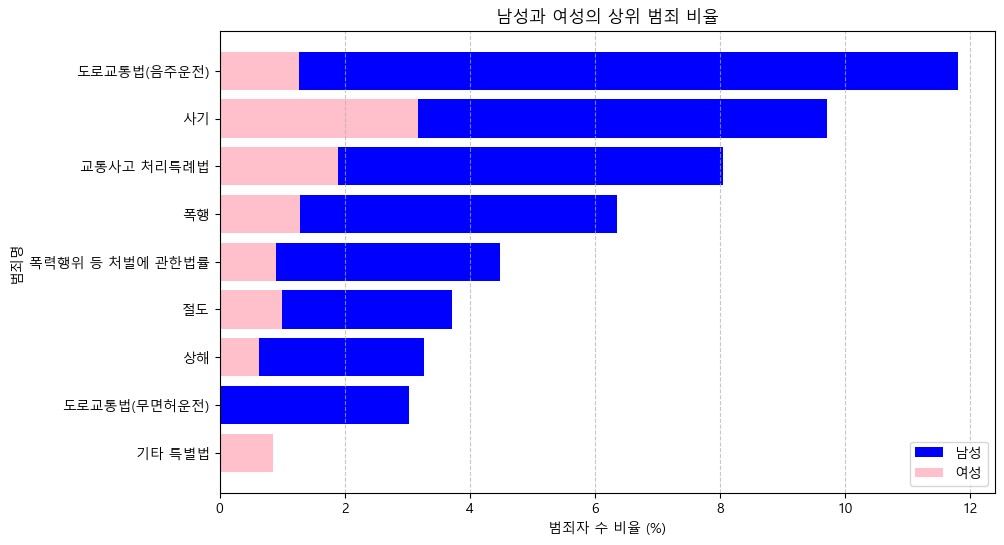

In [179]:
# 전체 범죄 수 계산
total_crime_count = df_grouped['범죄자 수'].sum()

# 남성과 여성에서 각각 상위 범죄 추출
top_crimes_male = df_grouped[df_grouped['성별'] == '남성'].nlargest(8, '범죄자 수')
top_crimes_female = df_grouped[df_grouped['성별'] == '여성'].nlargest(8, '범죄자 수')

# 남성과 여성의 상위 범죄 비율 계산
top_crime_ratio_male = top_crimes_male['범죄자 수'] / total_crime_count * 100
top_crime_ratio_female = top_crimes_female['범죄자 수'] / total_crime_count * 100

# 시각화
plt.figure(figsize=(10, 6))

plt.barh(top_crimes_male['범죄명'], top_crime_ratio_male, color='blue', label='남성')
plt.barh(top_crimes_female['범죄명'], top_crime_ratio_female, color='pink', label='여성')

plt.xlabel('범죄자 수 비율 (%)')
plt.ylabel('범죄명')
plt.title('남성과 여성의 상위 범죄 비율')
plt.legend()

plt.gca().invert_yaxis()  # y축 역순으로 정렬
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


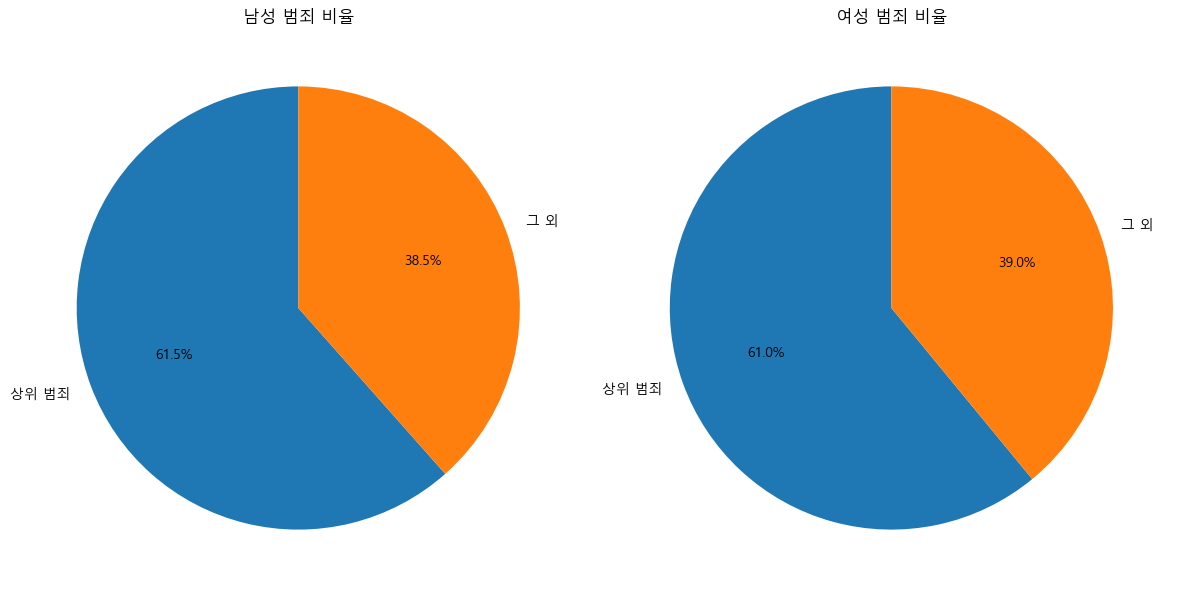

In [178]:
# 전체 범죄 수 계산
total_crime_count = df_grouped['범죄자 수'].sum()

# 각 성별에서 상위 범죄 추출
top_crimes_male = df_grouped[df_grouped['성별'] == '남성'].nlargest(8, '범죄자 수')
top_crimes_female = df_grouped[df_grouped['성별'] == '여성'].nlargest(8, '범죄자 수')

# 각 성별에서 상위 범죄의 수
top_crime_count_male = top_crimes_male['범죄자 수'].sum()
top_crime_count_female = top_crimes_female['범죄자 수'].sum()

# 각 성별에서 그 외 범죄의 수 계산
other_crime_count_male = df_grouped[df_grouped['성별'] == '남성']['범죄자 수'].sum() - top_crime_count_male
other_crime_count_female = df_grouped[df_grouped['성별'] == '여성']['범죄자 수'].sum() - top_crime_count_female

# 시각화
plt.figure(figsize=(12, 6))

# 남성의 파이 차트
plt.subplot(1, 2, 1)
plt.pie([top_crime_count_male, other_crime_count_male], labels=['상위 범죄', '그 외'], autopct='%1.1f%%', startangle=90)
plt.title('남성 범죄 비율')

# 여성의 파이 차트
plt.subplot(1, 2, 2)
plt.pie([top_crime_count_female, other_crime_count_female], labels=['상위 범죄', '그 외'], autopct='%1.1f%%', startangle=90)
plt.title('여성 범죄 비율')

plt.tight_layout()
plt.show()

In [171]:
# 남성과 여성에서 각각 상위 범죄 추출
top_crimes_male = df_grouped[df_grouped['성별'] == '남성'].nlargest(8, '범죄자 수')['범죄명']
top_crimes_female = df_grouped[df_grouped['성별'] == '여성'].nlargest(8, '범죄자 수')['범죄명']

# 공통 상위 범죄 추출
common_top_crimes = set(top_crimes_male) & set(top_crimes_female)
print("공통 상위 범죄:", common_top_crimes)


공통 상위 범죄: {'교통사고 처리특례법', '폭행', '절도', '폭력행위 등 처벌에 관한법률', '상해', '도로교통법(음주운전)', '사기'}


---

#### 연령

In [301]:
df_age = pd.read_excel('C:/Users/galax/Downloads/criminal_age.xlsx')

df_age = pd.DataFrame(df_age)
df_age.info()
df_age.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 127 entries, 연도 to 2022.20
dtypes: object(127)
memory usage: 165.8+ KB


,연도,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,...,2022.11,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20
0,나이대,14세,15세,16세,17세,18세,19세,20세,21세,22세,...,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상
1,절도,3785,5081,5138,3486,2510,2193,1961,1921,2103,...,1200,5776,4771,5223,5757,6331,7735,8339,15774,13278
2,장물,31,52,130,139,91,82,73,73,45,...,4,38,35,43,57,30,56,59,65,18
3,사기,353,770,1267,1845,1983,3120,3374,3204,3333,...,4229,18658,13512,14567,15686,17439,19290,16922,19088,3331
4,횡령,113,176,371,415,348,322,275,291,307,...,338,1792,1836,2332,3006,3244,3784,3553,5476,2812


In [302]:
df_age.set_index('연도', inplace=True)
df_age.replace('-', np.nan, inplace=True)
df_age.replace('/', np.nan, inplace=True)

# 열 이름에서 소수점(.) 이후의 숫자를 무시하고 연도만 추출하여 DateTime 형식으로 변환
df_age.columns = pd.to_datetime(df_age.columns.str.split('.').str[0], format='%Y')

df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 나이대 to nan
Columns: 126 entries, 2017-01-01 to 2022-01-01
dtypes: object(126)
memory usage: 165.7+ KB


In [303]:
df_age.head()

,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01,2017-01-01,...,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01,2022-01-01
연도,,,,,,,,,,,,,,,,,,,,,
나이대,14세,15세,16세,17세,18세,19세,20세,21세,22세,23세,...,25세,26~30세,31~35세,36~40세,41~45세,46~50세,51~55세,56~60세,61~70세,71세이상
절도,3785,5081,5138,3486,2510,2193,1961,1921,2103,2049,...,1200,5776,4771,5223,5757,6331,7735,8339,15774,13278
장물,31,52,130,139,91,82,73,73,45,54,...,4,38,35,43,57,30,56,59,65,18
사기,353,770,1267,1845,1983,3120,3374,3204,3333,3503,...,4229,18658,13512,14567,15686,17439,19290,16922,19088,3331
횡령,113,176,371,415,348,322,275,291,307,332,...,338,1792,1836,2332,3006,3244,3784,3553,5476,2812


c:\Users\galax\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.draw()


<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 나이대 to nan
Columns: 126 entries, 2017-01-01 to 2022-01-01
dtypes: object(126)
memory usage: 169.8+ KB


C:\Users\galax\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  func(*args, **kwargs)
C:\Users\galax\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


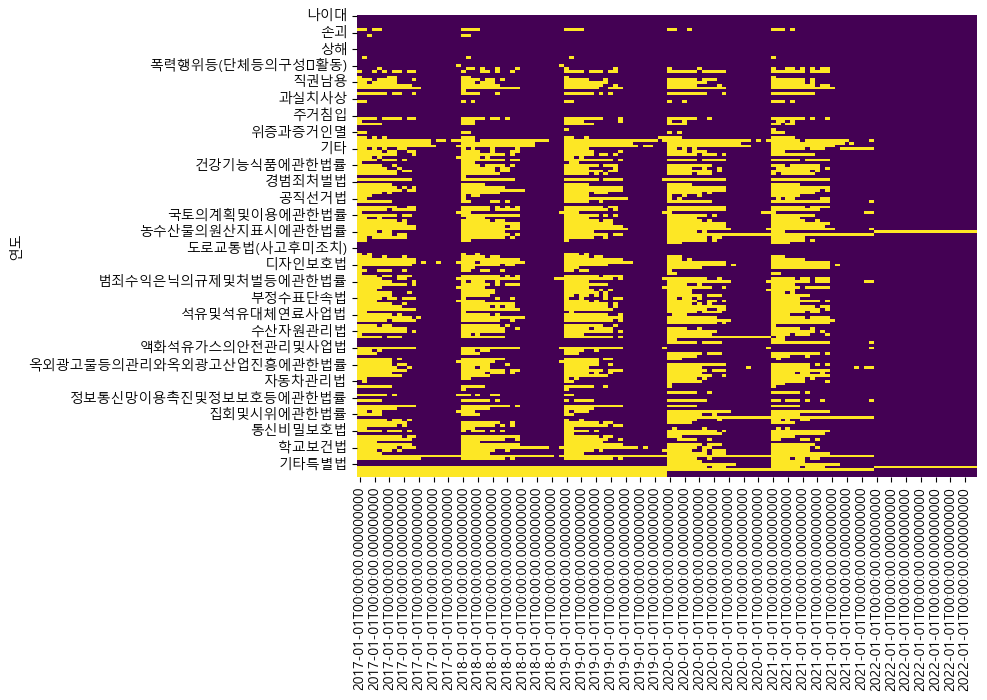

In [310]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_age.isnull(), cmap='viridis', cbar=False)

# data type 확인
df_age.info()

In [319]:
# 나이대 리스트 생성
row1 = set(df_age.iloc[0])
#print(list(row1))
age_groups = list(row1)

In [313]:
df_transposed = df_age.transpose()
df_age_change = pd.DataFrame(df_transposed)
#print(df_age_change)
#df_age_change.columns

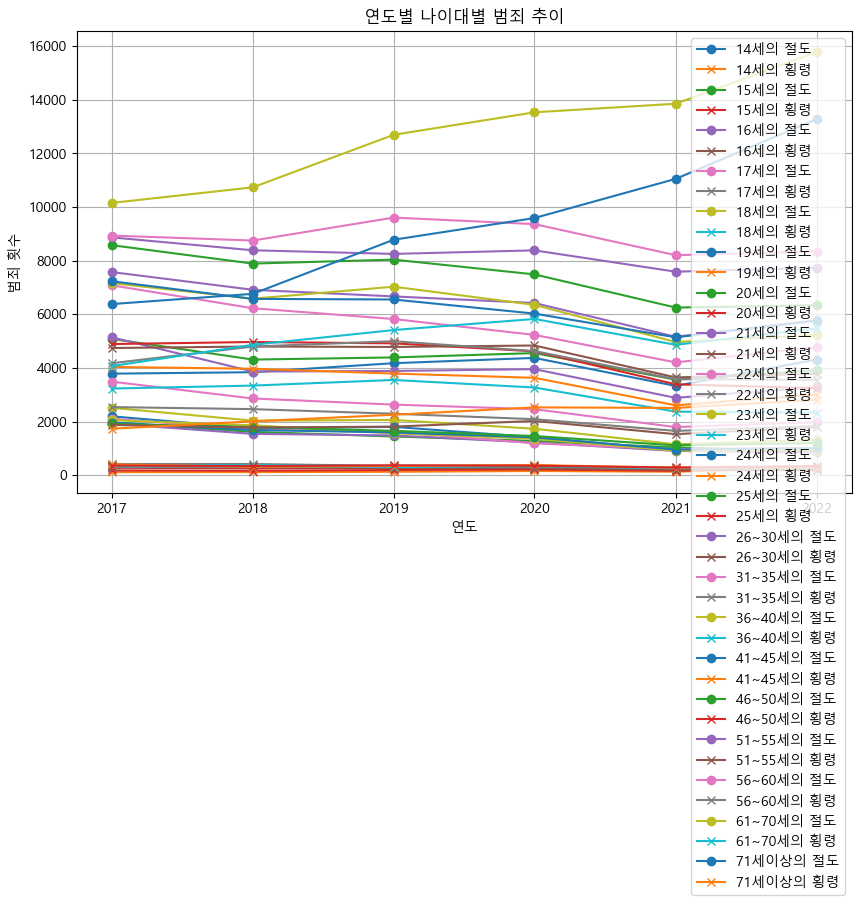

In [314]:
df = df_age_change

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 나이대의 범죄 추이를 선 그래프로 표시
for age_group in df['나이대'].unique():
    df_age_group = df[df['나이대'] == age_group]
    plt.plot(df_age_group.index, df_age_group['절도'], marker='o', label=f'{age_group}의 절도')
    plt.plot(df_age_group.index, df_age_group['횡령'], marker='x', label=f'{age_group}의 횡령')

plt.title('연도별 나이대별 범죄 추이')
plt.xlabel('연도')
plt.ylabel('범죄 횟수')
plt.legend()
plt.grid(True)
plt.show()

In [321]:
print(df_age_change.head())

연도          나이대    절도   장물    사기   횡령   배임   손괴   살인  강도  방화  ...   
2017-01-01  14세  3785   31   353  113  NaN   77    1   9  27  ...  \
2017-01-01  15세  5081   52   770  176  NaN  120    1  33  29  ...   
2017-01-01  16세  5138  130  1267  371    1  174  NaN  70  36  ...   
2017-01-01  17세  3486  139  1845  415  NaN  235   11  69  16  ...   
2017-01-01  18세  2510   91  1983  348  NaN  348    4  63  10  ...   

연도         학원의설립운영및과외교습에관한법률 화물자동차운수사업법 화재로인한재해보상과보험가입에관한법률   
2017-01-01               NaN        NaN                 NaN  \
2017-01-01               NaN        NaN                 NaN   
2017-01-01               NaN        NaN                 NaN   
2017-01-01               NaN        NaN                 NaN   
2017-01-01                 1        NaN                 NaN   

연도         화재예방・소방시설설치유지및안전관리에관한법률 화학물질관리법 기타특별법  NaN  NaN  NaN  NaN  
2017-01-01                     NaN      38    30  NaN  NaN  NaN  NaN  
2017-01-01                     NaN      39    46  NaN  NaN  NaN 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


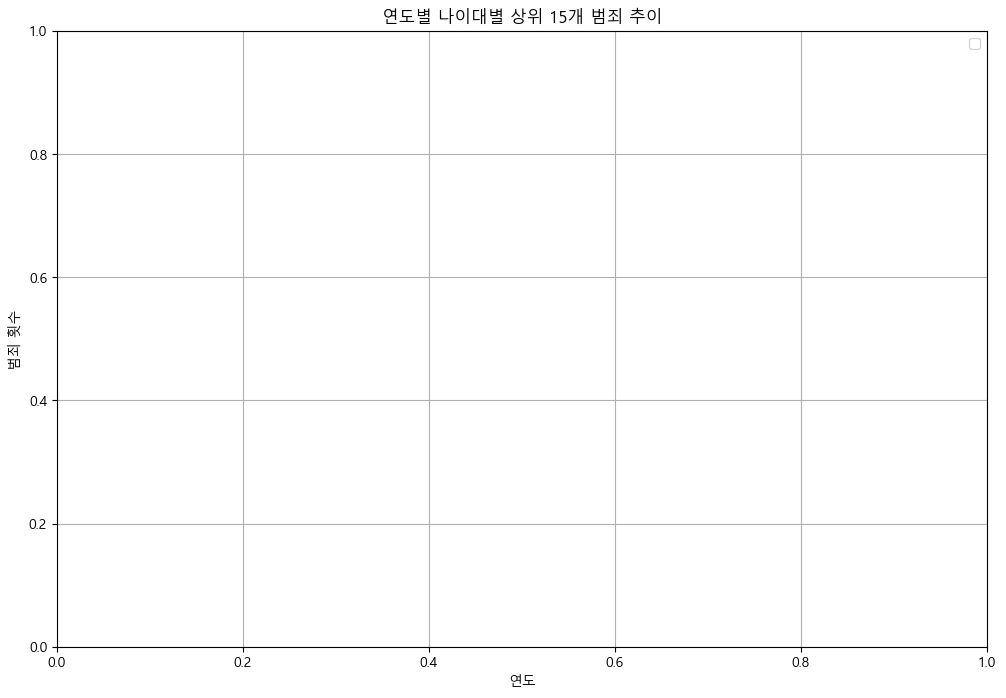

In [320]:
import matplotlib.pyplot as plt

# 숫자 열만 필터링
numeric_columns = df_age_change.drop(['나이대'], axis=1).select_dtypes(include=['int', 'float']).columns

# 상위 15개 범죄 선택
top_crimes = df_age_change[numeric_columns].sum().nlargest(15).index

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 나이대별로 상위 15개 범죄에 대한 추이를 선 그래프로 표시합니다.
for age_group in age_groups:
    for crime_type in top_crimes:
        plt.plot(df_age_change[df_age_change['나이대'] == age_group].index, df_age_change[df_age_change['나이대'] == age_group][crime_type], marker='o', label=f'{age_group}의 {crime_type}')

plt.title('연도별 나이대별 상위 15개 범죄 추이')
plt.xlabel('연도')
plt.ylabel('범죄 횟수')
plt.legend()  # 범례를 추가합니다.
plt.grid(True)
plt.show()



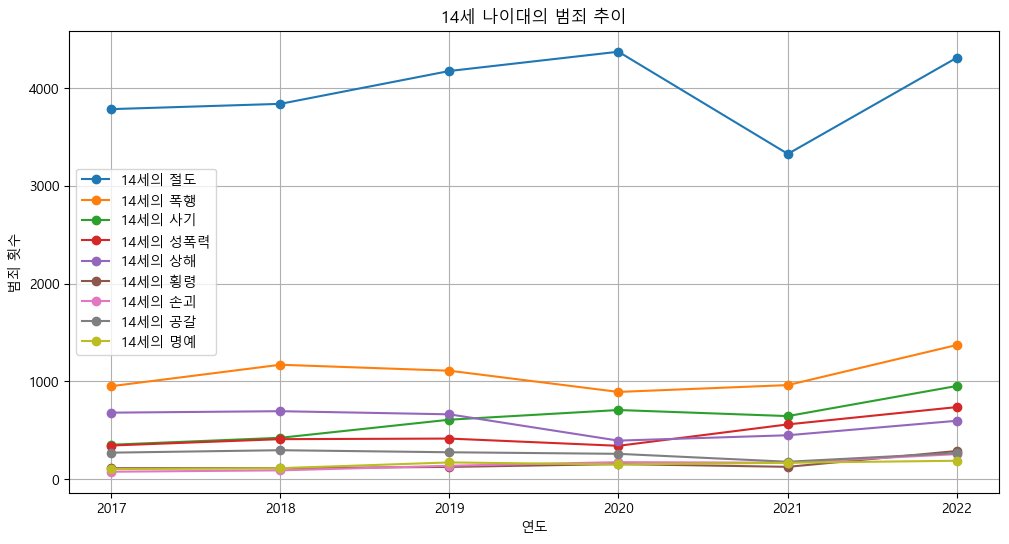

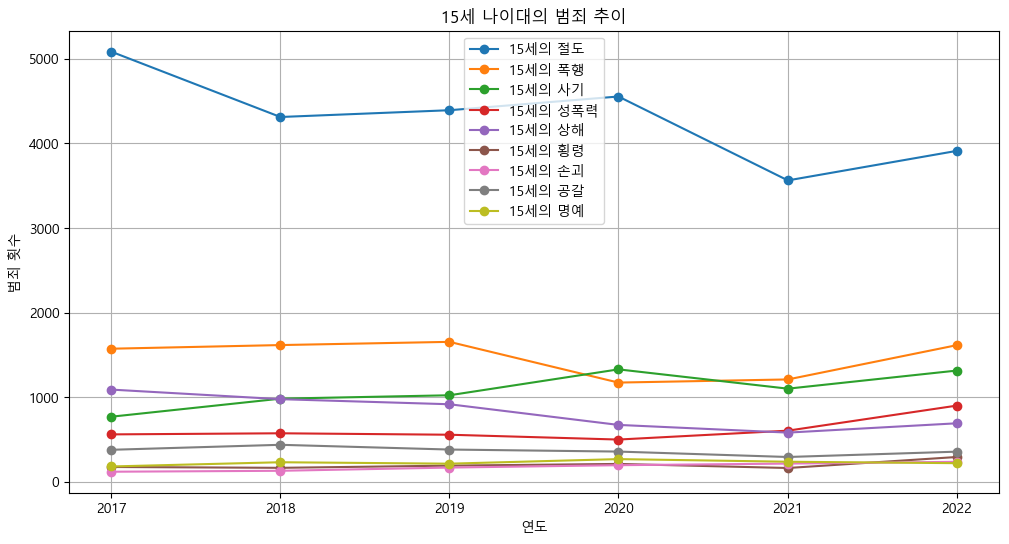

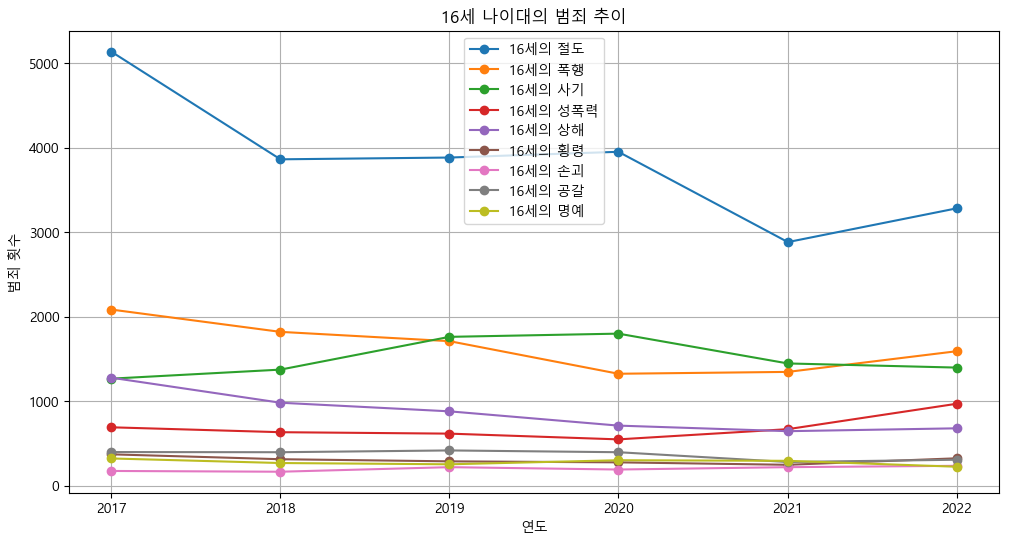

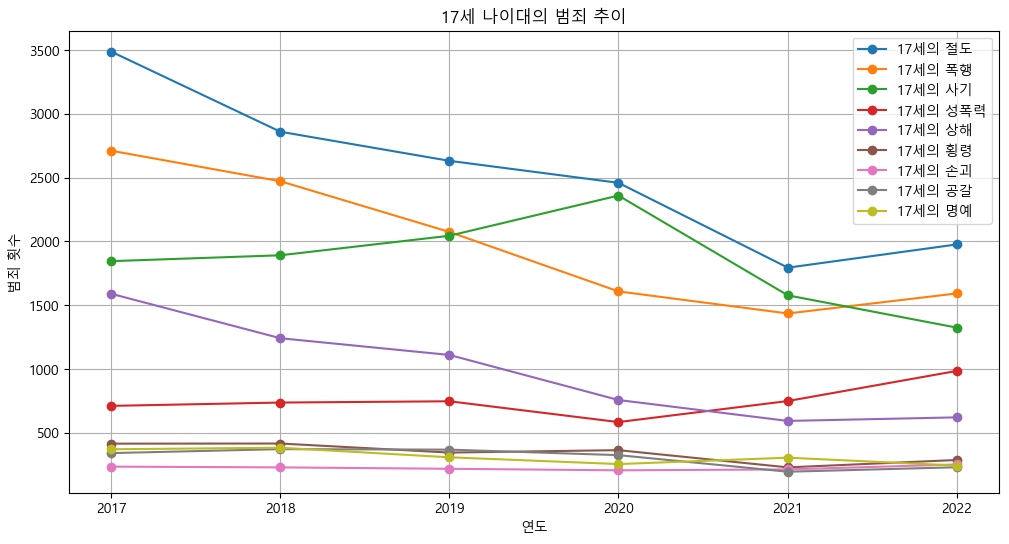

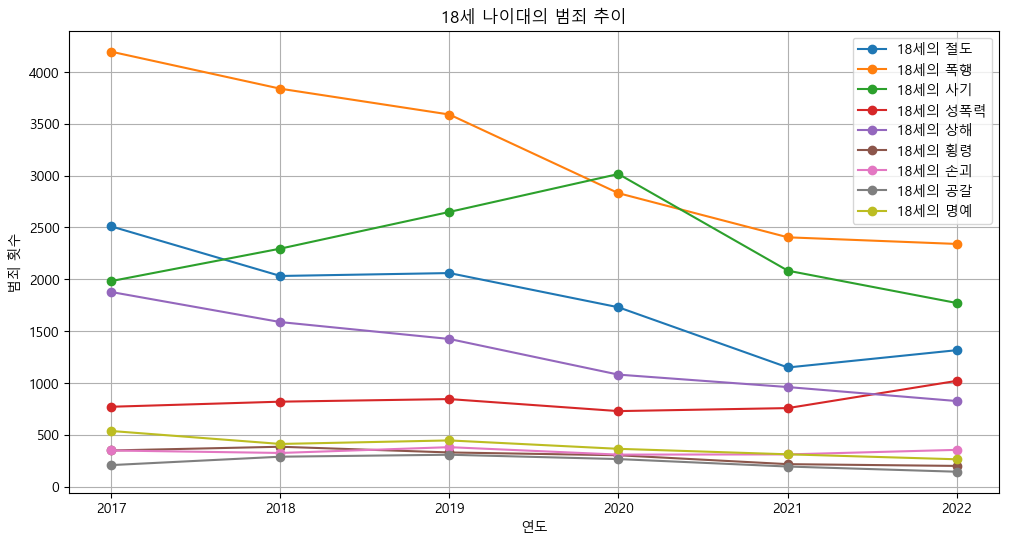

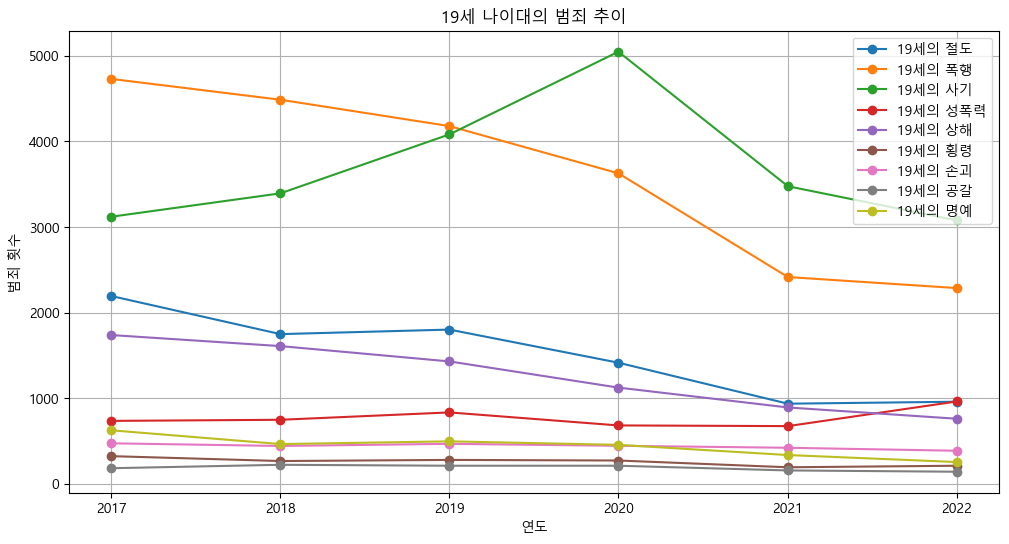

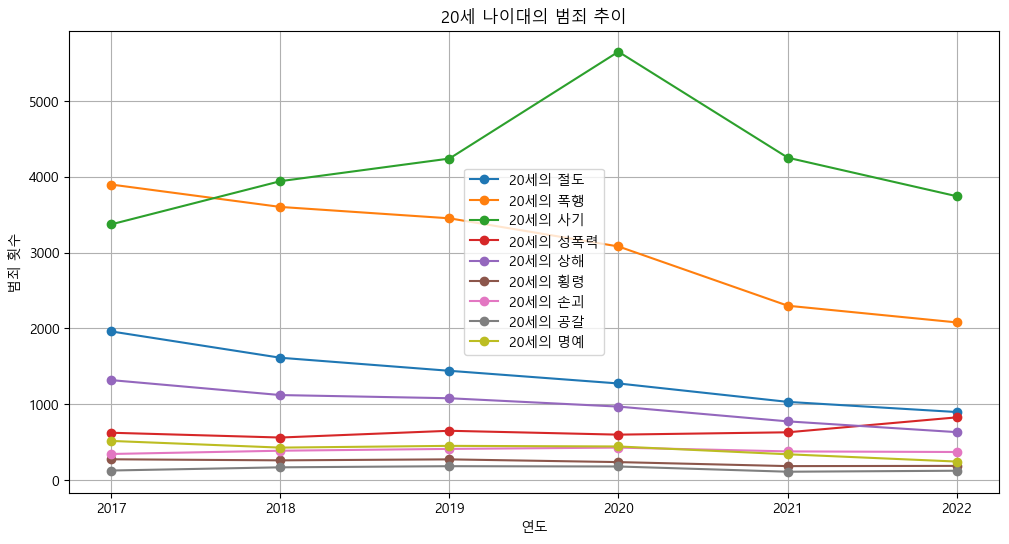

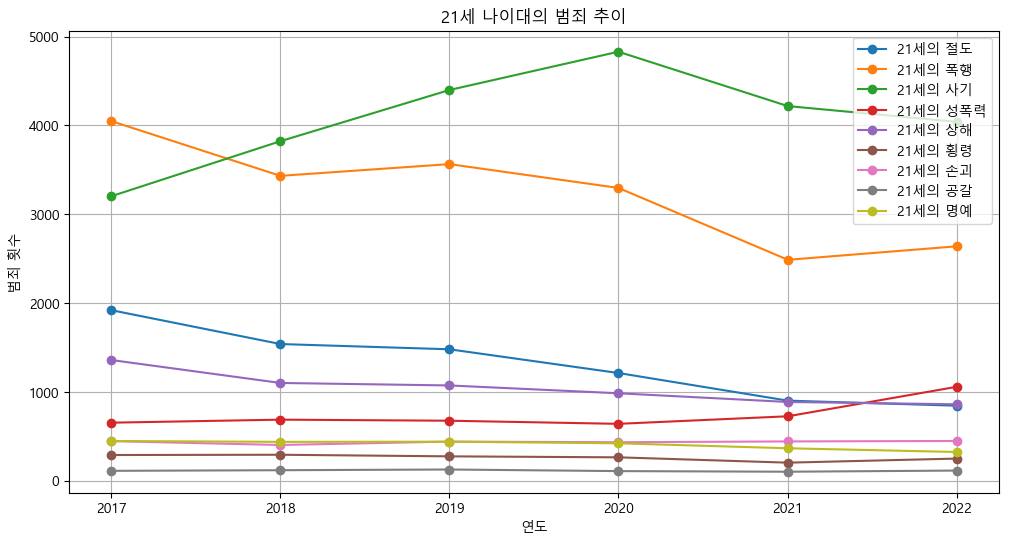

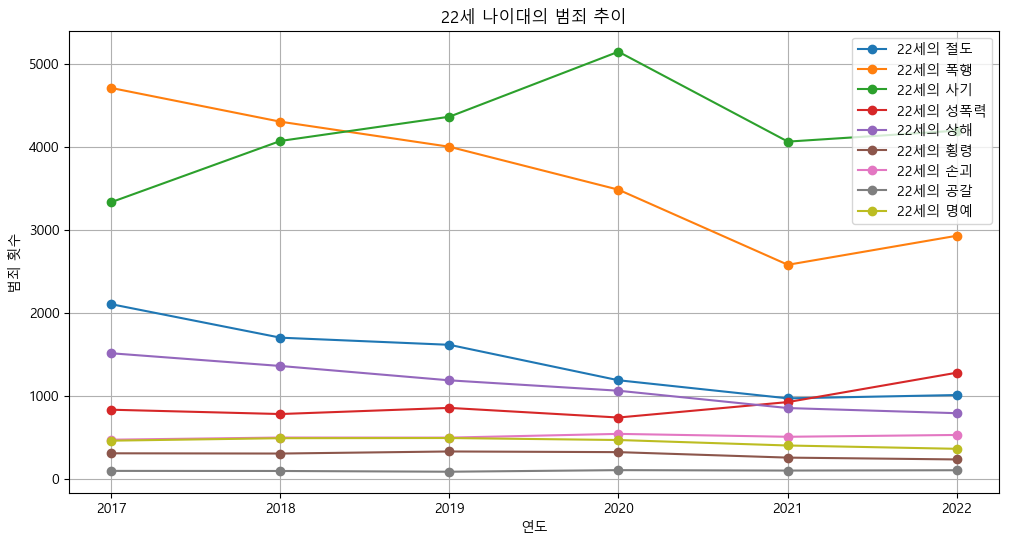

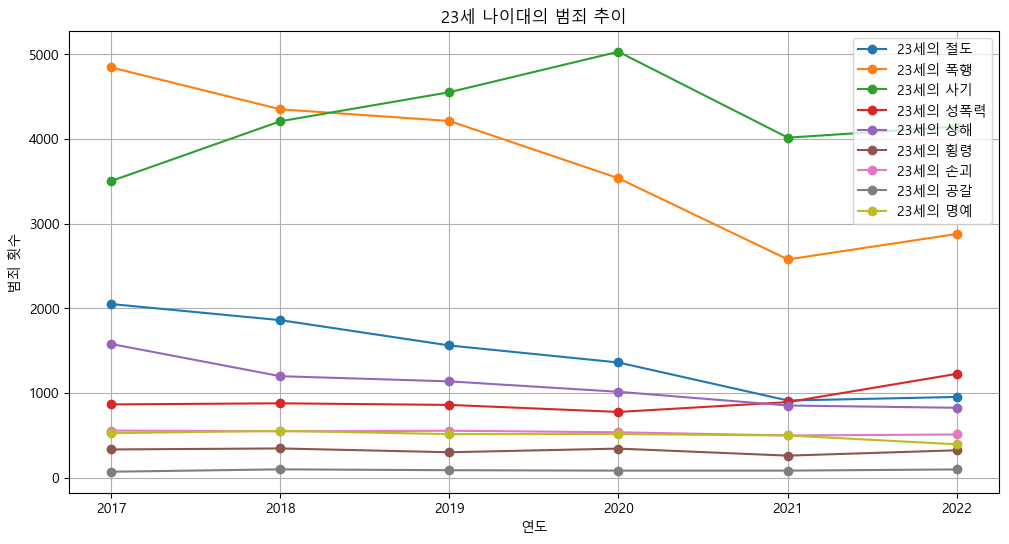

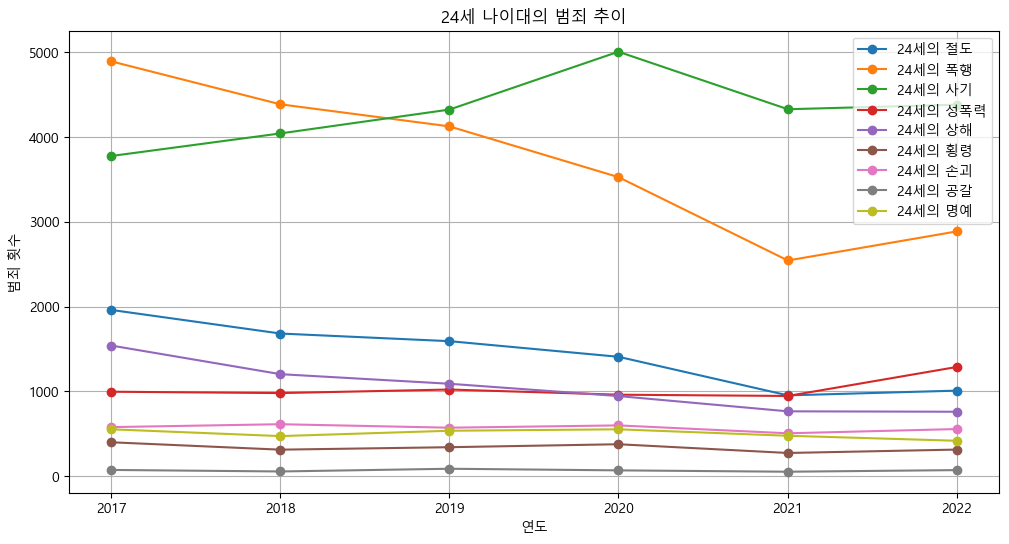

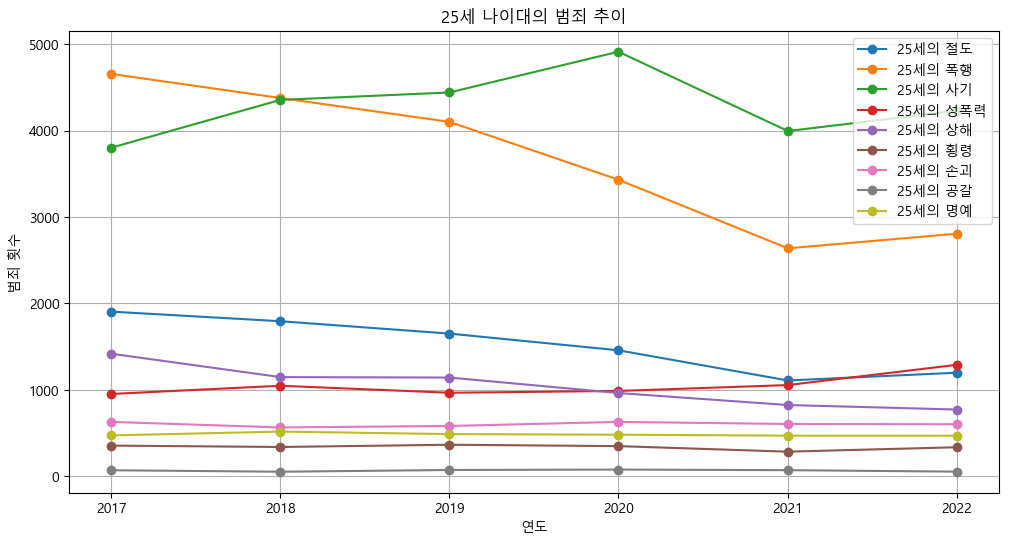

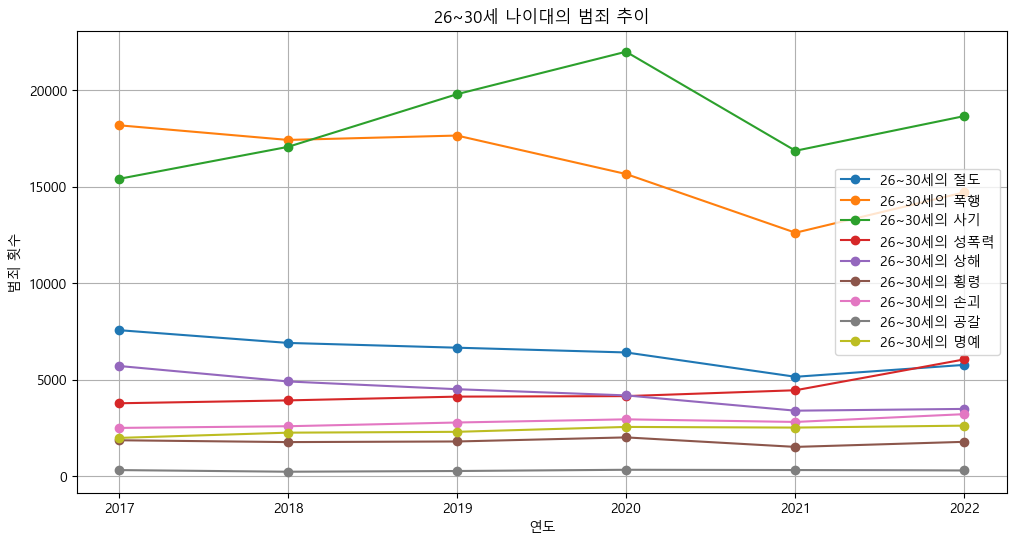

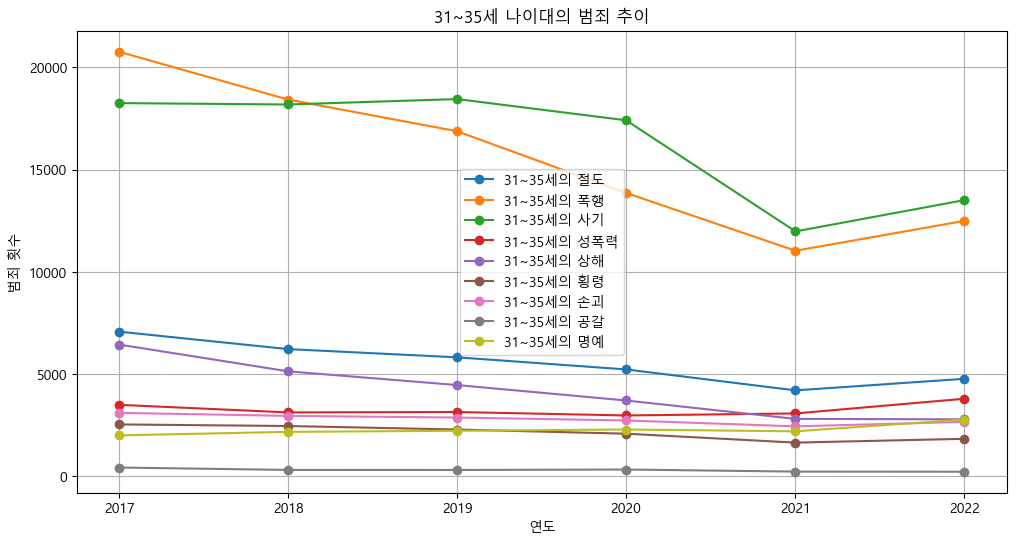

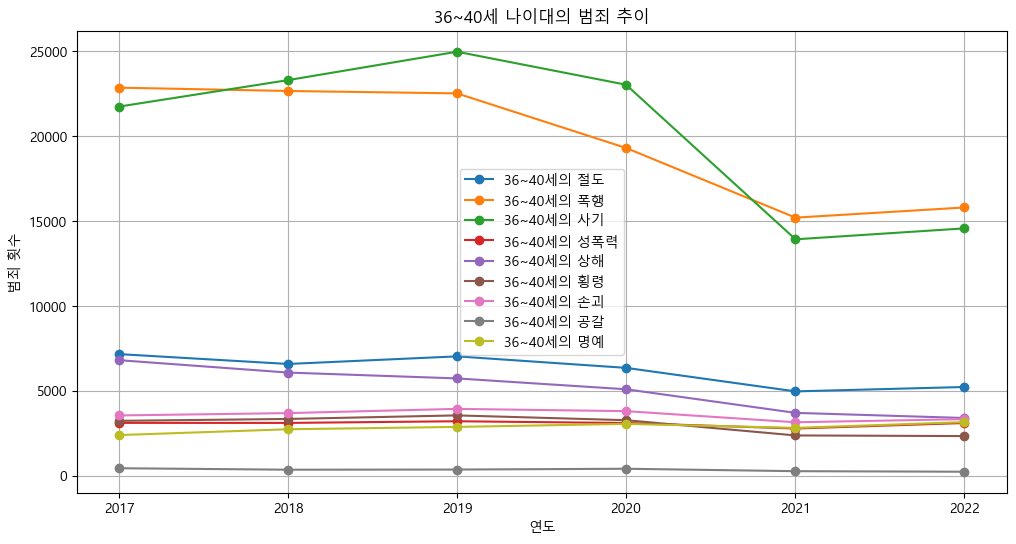

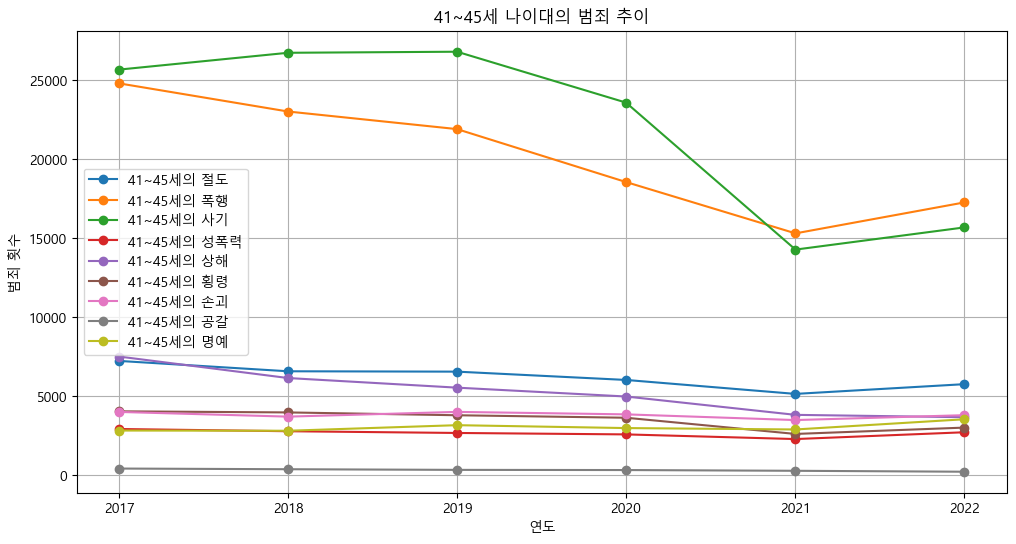

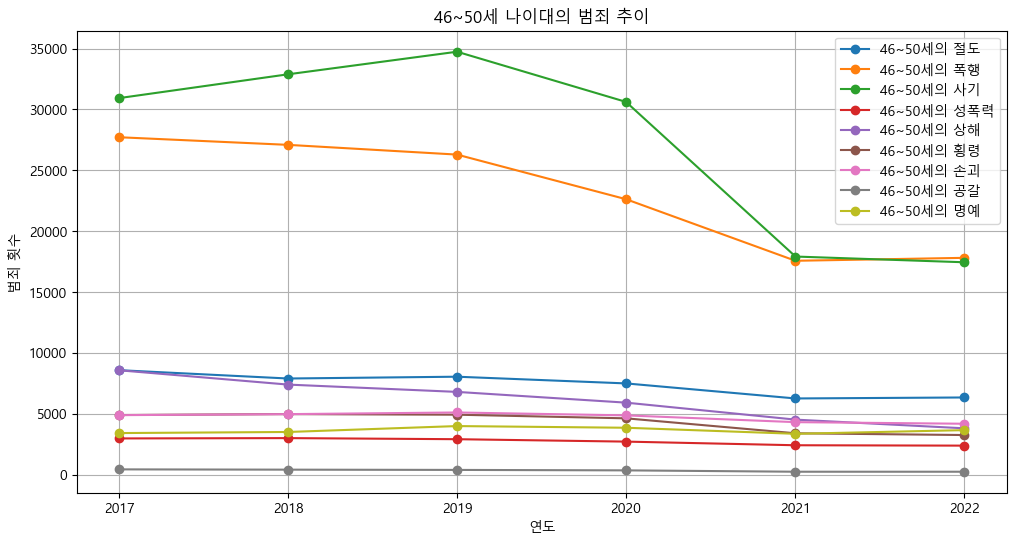

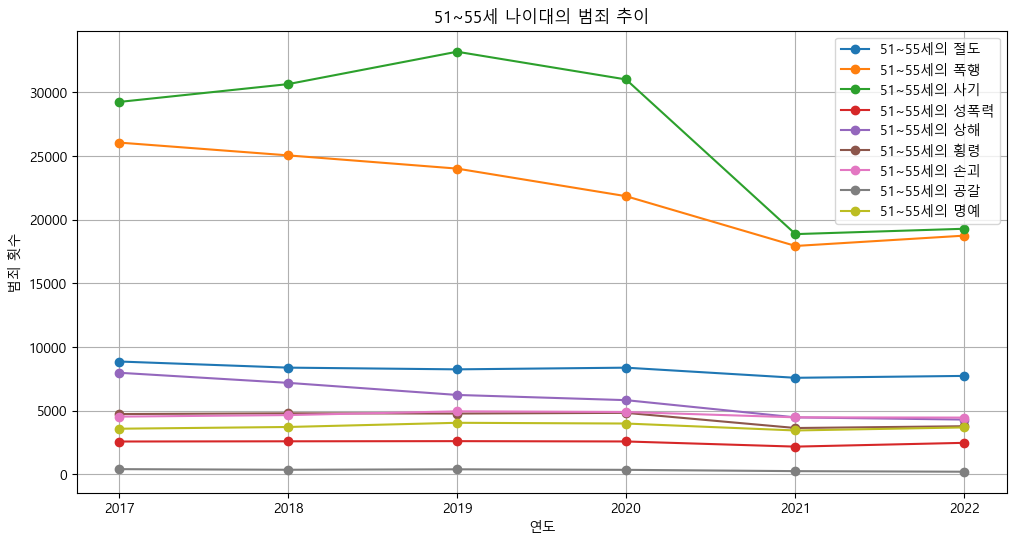

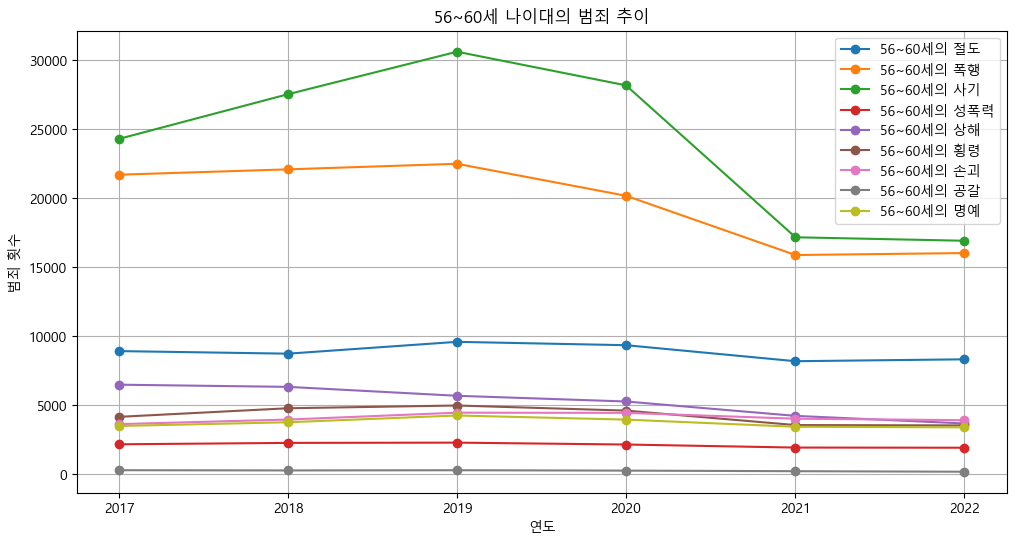

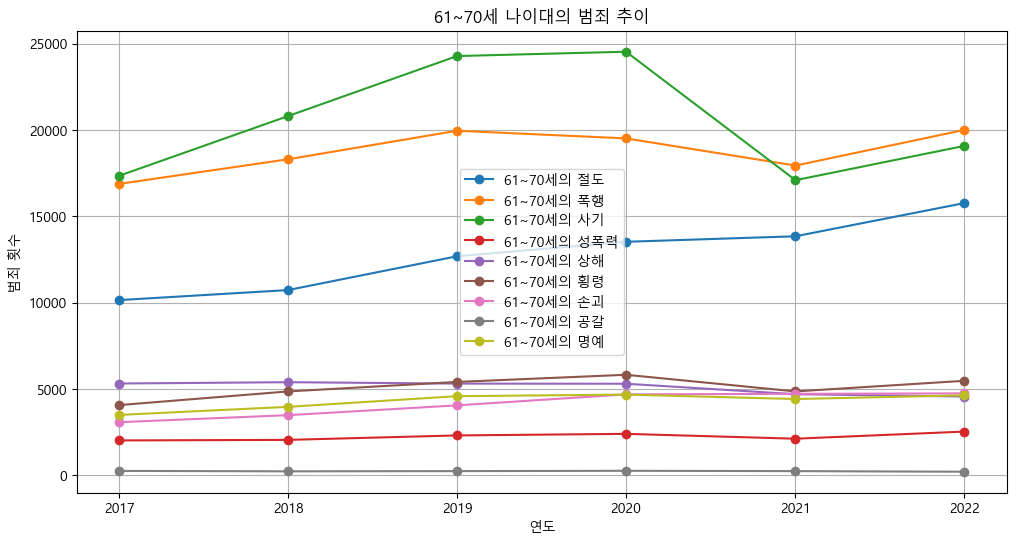

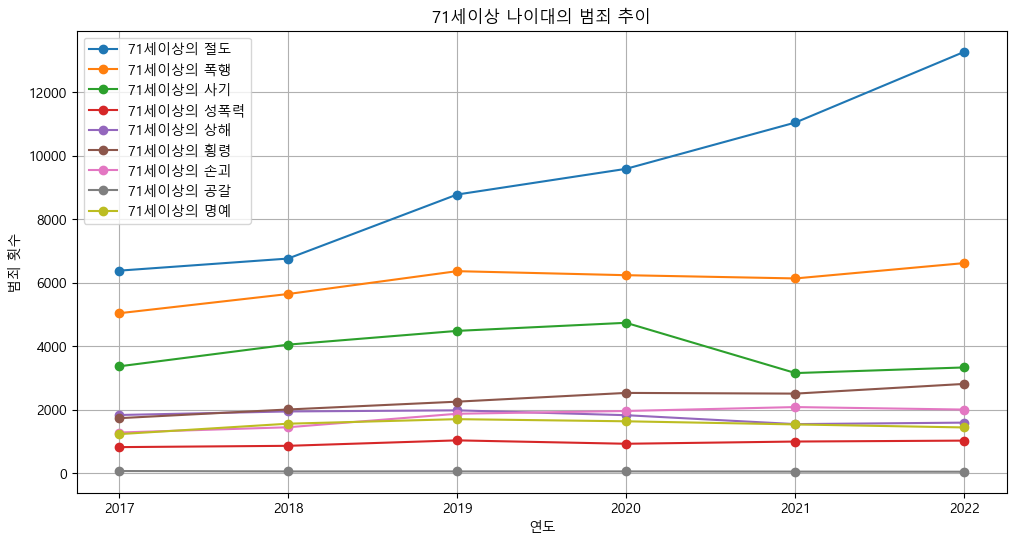

In [335]:
import matplotlib.pyplot as plt

# 선택한 상위 범죄 목록
selected_crimes = ['절도', '폭행', '사기', '성폭력', '상해', '횡령', '손괴', '공갈', '명예']

# 각 나이대별로 figure를 생성하여 그래프를 그립니다.
for age_group in df_age_change['나이대'].unique():
    # 새로운 figure를 생성합니다.
    plt.figure(figsize=(12, 6))
    
    # 현재 나이대에 해당하는 데이터만 선택합니다.
    df_age_group = df_age_change[df_age_change['나이대'] == age_group]
    
    # 시계열 그래프를 그립니다.
    for crime_type in selected_crimes:
        plt.plot(df_age_group.index, df_age_group[crime_type], marker='o', label=f'{age_group}의 {crime_type}')
    
    plt.title(f'{age_group} 나이대의 범죄 추이')
    plt.xlabel('연도')
    plt.ylabel('범죄 횟수')
    plt.legend()
    plt.grid(True)
    plt.show()
